In [56]:
from __future__ import division

#matplotlib setup
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline

params = {
   'axes.labelsize': 22,
   'text.fontsize': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'text.usetex': True,
   'figure.figsize': [10, 6]
   }
mpl.rcParams.update(params)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}\usepackage{bm}']

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

import pandas as pd

import numpy as np
import scipy

import matplotlib.animation as animation

from IPython.display import HTML

In [57]:
#units and constants
ghz = 10**9
mhz = 10**6
ten14 = 10**14
nm = 10**(-9)

c = 3*10**8

df = 10*ghz

#Question 2b - cavity length

deltaf = 1.5*df

d = c/(2*deltaf)

print 'Cavity length is %f m' %(d)

Cavity length is 0.010000 m


In [58]:
#Question 2c - delta d

wav = 780*nm

fm = c/wav

print 'delta d is %f nanometres' %(wav/2/1.5/nm)

delta d is 260.000000 nanometres


In [59]:
#Question 2d - half of intensity

F = 1500

deltafhalf = deltaf/F
print 'delta f half is %f MHz' %(deltafhalf/mhz)

delta f half is 10.000000 MHz


In [60]:
#Question 2e - reflectiviy

coeffs = [F,np.pi,-F]
roots = np.roots(coeffs)
r = roots[1]

# OR
r = 1- np.pi/(2*F)

print 'The reflectivity is %f' %(r)

The reflectivity is 0.998953


In [61]:
#Question 2f - maximum transmission

ldelta = np.pi
sf = 4*r**2/(1-r**2)**2

tmin = 1/(1+sf*(np.sin(ldelta/2))**2)
print 'The minimum transmittance is %f times 10^(-6)' %(tmin/10**(-6))

The minimum transmittance is 1.097771 times 10^(-6)


### Simulation Time!

In [205]:
sf1 = 5000

#function for the transmission for a given frequency and change in d

def trans(f,dd):
    return 1/(1+sf1*(np.sin(2*np.pi*f*(d+dd)/c))**2)

def rickium(f):
    return np.exp(-(f-3.84610*10**(14))**2/(2*(0.000005*10**(14))**2))

def mortium(f):
    return (np.exp(-(f-3.84620*10**(14))**2/(2*(0.000005*10**(14))**2))
            +1/10*np.exp(-(f-3.84617*10**(14))**2/(2*(0.000005*10**(14))**2)))

fspace = np.linspace(fm-0.00009*1e14,fm+0.00009*1e14,1000)



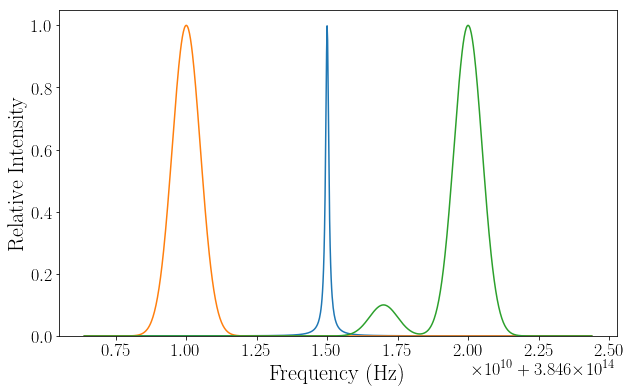

In [206]:
plt.plot(fspace,trans(fspace,0*nm))
plt.plot(fspace,rickium(fspace))
plt.plot(fspace,mortium(fspace))
plt.ylim([0,1.05])
plt.xlabel(r'Frequency (Hz)')
plt.ylabel(r'Relative Intensity')
plt.show()

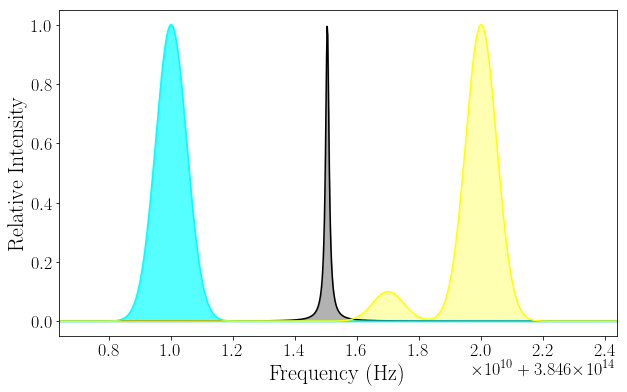

In [212]:
#animate time

fig, ax = plt.subplots()
ax.set_xlabel(r'Frequency (Hz)')
ax.set_ylabel(r'Relative Intensity')


ax.set_xlim([fspace[0],fspace[-1]])

fabper, = ax.plot(fspace,trans(fspace,0),color='black')
ax.fill_between(fspace, trans(fspace,0),color='black',alpha=0.3)

ax.plot(fspace,rickium(fspace),color='cyan')
ax.fill_between(fspace, rickium(fspace),color='cyan',alpha=0.3)

ax.plot(fspace,mortium(fspace),color='yellow')
ax.fill_between(fspace, mortium(fspace),color='yellow',alpha=0.3)

def animate(dd):
    fabper.set_ydata(trans(fspace,dd*nm))  # update the data
    for coll in ax.collections:
        ax.collections.remove(coll)
    ax.fill_between(fspace, trans(fspace,dd*nm),color='black',alpha=0.3)
    ax.fill_between(fspace, rickium(fspace),color='cyan',alpha=0.3)
    ax.fill_between(fspace, mortium(fspace),color='yellow',alpha=0.3)
    return fabper,

def init():
    fabper.set_ydata(np.ma.array(fspace, mask=True))
    return fabper,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 780), 
                              init_func=init,
                              interval=50, blit=True)

HTML(ani.to_html5_video())

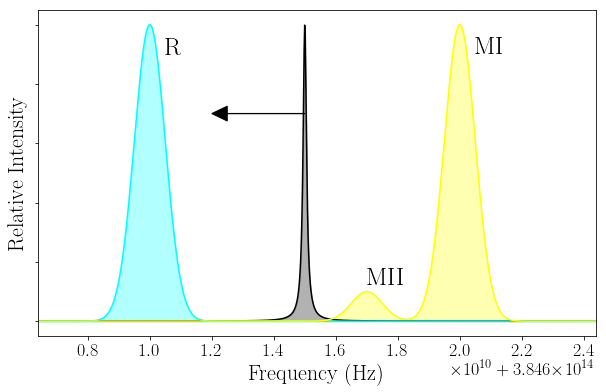

In [253]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Frequency (Hz)')
ax.set_ylabel(r'Relative Intensity')


ax.set_xlim([fspace[0],fspace[-1]])

fabper, = ax.plot(fspace,trans(fspace,0),color='black')
ax.fill_between(fspace, trans(fspace,0),color='black',alpha=0.3)

ax.plot(fspace,rickium(fspace),color='cyan')
ax.fill_between(fspace, rickium(fspace),color='cyan',alpha=0.3)

ax.plot(fspace,mortium(fspace),color='yellow')
ax.fill_between(fspace, mortium(fspace),color='yellow',alpha=0.3)

ax.text(1*3.846105e14,0.9,r'R',fontsize=25)
ax.text(1*3.846170e14,0.12,r'MII',fontsize=25)
ax.text(1*3.846205e14,0.9,r'MI',fontsize=25)

ax.arrow(3.84615e14, 0.7, -0.25e10, 0, head_width=0.05, head_length=5e8, fc='k', ec='k')

ax.set_yticklabels([])

plt.savefig('freq.pdf')

In [248]:
plt.savefig?

In [257]:
# Convolution

def convol(dd):
    dataar = []
    for d in dd:
        dataar.append(np.sum((trans(fspace,d*nm)*(rickium(fspace)+mortium(fspace))))*
                      (fspace[-1]-fspace[0])/len(fspace))
    
    dataar = np.dot(dataar,1/191282958.11654979)
    
    
    return dataar

In [209]:
deltachange = np.arange(1, 780)

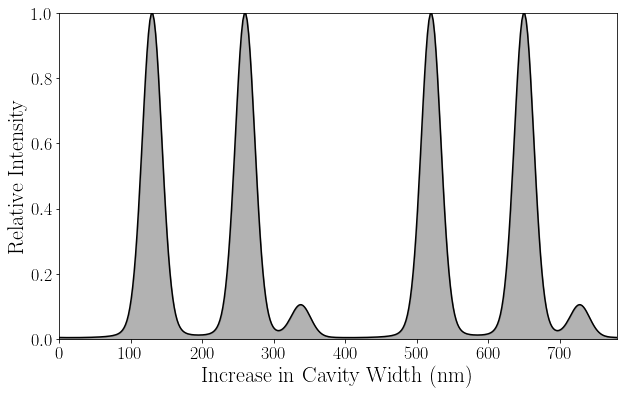

In [210]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Increase in Cavity Width (nm)')
ax.set_ylabel(r'Relative Intensity')

ax.set_xlim([0,780])
ax.set_ylim([0,1])

deltachange = [0]

obsint, = ax.plot(deltachange,convol(deltachange),color='black')
ax.fill_between(deltachange, convol(deltachange),color='black',alpha=0.3)

def animate(dd):
    deltachange.append(dd)
    obsint.set_xdata(deltachange)
    obsint.set_ydata(convol(deltachange))  # update the data
    for coll in ax.collections:
        ax.collections.remove(coll)
        
    ax.fill_between(deltachange, convol(deltachange),color='black',alpha=0.3)
    return obsint,

def init():
    obsint.set_ydata(np.ma.array(deltachange, mask=True))
    return obsint,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 780,2), 
                              init_func=init,
                              interval=50, blit=True)

HTML(ani.to_html5_video())

In [189]:
max(convol(deltachange))

191282958.11654979

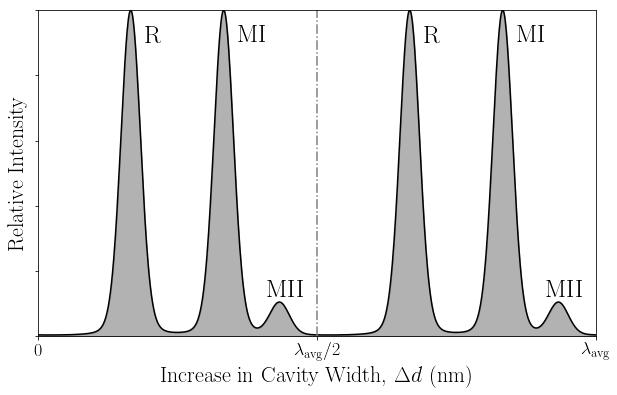

In [294]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Increase in Cavity Width, $\Delta d$ (nm)')
ax.set_ylabel(r'Relative Intensity')

ax.set_xlim([0,780])
ax.set_ylim([0,1])

deltachange = np.linspace(0,wav*10**9,1000)

plt.xticks([0, wav/2*10**9, wav*10**9],
           ['$0$', r'$\lambda_{\text{avg}}/2$', r'$\lambda_{\text{avg}}$'])


ax.plot(deltachange,convol(deltachange),color='black')
ax.plot([390.000001,390.000001],[0,1],color='grey',linestyle='-.')
ax.fill_between(deltachange, convol(deltachange),color='black',alpha=0.3)

ax.text(150,0.9,r'R',fontsize=25)
ax.text(150+390,0.9,r'R',fontsize=25)
ax.text(320,0.12,r'MII',fontsize=25)
ax.text(320+390,0.12,r'MII',fontsize=25)
ax.text(280,0.9,r'MI',fontsize=25)
ax.text(280+390,0.9,r'MI',fontsize=25)

ax.set_yticklabels([])

plt.savefig('conv.pdf')